# Convolutional Neural Networks & Computer Vision

## A typical architecture of a CNN

Computer Vision is the practice of finding patterns in visual data (Self-driving cars)

Convolutional neural networks are no different to other kinds of deep learning neural networks in the fact they can be created in many different ways

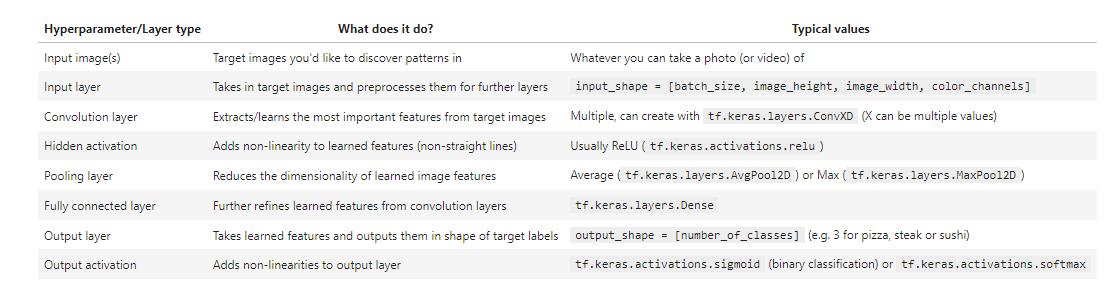

How they stack together:

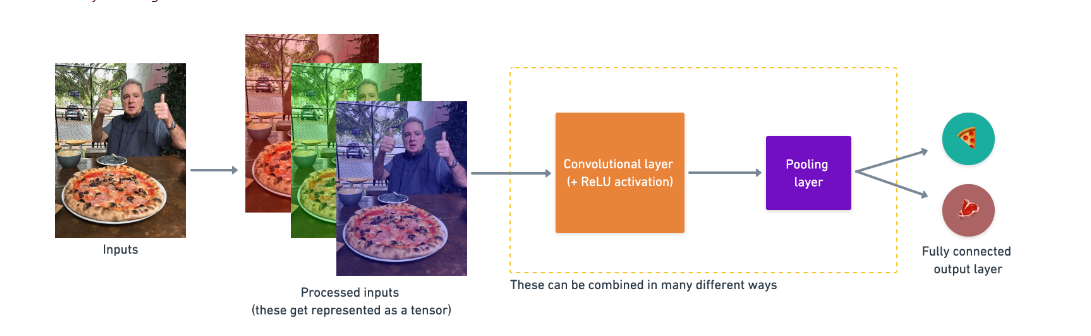

## Phase 01

In [6]:
# Fetch pizza_steak data
import zipfile

# Download zip file of pizza_steak images
!curl -O https://storage.googleapis.com/ztm_tf_course/food_vision/pizza_steak.zip

# Unzip the downloaded file
zip_ref = zipfile.ZipFile('pizza_steak.zip', 'r')
zip_ref.extractall()
zip_ref.close()

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed

  0     0    0     0    0     0      0      0 --:--:-- --:--:-- --:--:--     0
  0     0    0     0    0     0      0      0 --:--:-- --:--:-- --:--:--     0
  0  104M    0  2710    0     0   1283      0 23:42:58  0:00:02 23:42:56  1284
  0  104M    0 45901    0     0  19233      0  1:34:55  0:00:02  1:34:53 19237
  0  104M    0  934k    0     0   281k      0  0:06:20  0:00:03  0:06:17  281k
  2  104M    2 2478k    0     0   568k      0  0:03:08  0:00:04  0:03:04  568k
  3  104M    3 3870k    0     0   717k      0  0:02:29  0:00:05  0:02:24  775k
  4  104M    4 5006k    0     0   791k      0  0:02:15  0:00:06  0:02:09 1187k
  6  104M    6 6686k    0     0   908k      0  0:01:57  0:00:07  0:01:50 1335k
  7  104M    7 7950k    0     0   955k      0  0:01:51  0:00:08  0:01:43 1403k
  8  104M    8 9038k    0     0   968k      0  0:01

Start with a smaller dataset for faster experimentation

### Data Exploration

In [7]:
ls pizza_steak

 Volume in drive D is New Volume
 Volume Serial Number is 0489-26E8

 Directory of D:\Learning\Learning Code\Machine Learning\ZTM TF Tutorials\pizza_steak

09/22/2022  10:50 AM    <DIR>          .
09/22/2022  10:52 AM    <DIR>          ..
09/22/2022  10:50 AM    <DIR>          test
09/22/2022  10:50 AM    <DIR>          train
               0 File(s)              0 bytes
               4 Dir(s)  274,227,265,536 bytes free


In [11]:
import os

# Walk through pizza_steak directory and list number of files
for dirpath, dirnames, filenames in os.walk("pizza_steak"):
    print(f'There are {len(dirnames)} directories and {len(filenames)} images in \'{dirpath}\'.')

There are 2 directories and 0 images in 'pizza_steak'.
There are 2 directories and 0 images in 'pizza_steak\test'.
There are 0 directories and 250 images in 'pizza_steak\test\pizza'.
There are 0 directories and 250 images in 'pizza_steak\test\steak'.
There are 2 directories and 0 images in 'pizza_steak\train'.
There are 0 directories and 750 images in 'pizza_steak\train\pizza'.
There are 0 directories and 750 images in 'pizza_steak\train\steak'.


In [12]:
len(os.listdir('pizza_steak/train/steak'))

750

In [13]:
# Get the class names
import pathlib
import numpy as np

# turn the path into a Python path
data_dir = pathlib.Path('pizza_steak/train/')

# create a list of class_names from the subdirectories
class_names = np.array(sorted([item.name for item in data_dir.glob('*')]))
print(class_names)

['pizza' 'steak']


In [16]:
# View an image
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import random

def view_random_image(target_dir, target_class):
    target_folder = target_dir + target_class
    random_image = random.sample(os.listdir(target_folder), 1)
    img = mpimg.imread(f'{target_folder}/{random_image[0]}')
    plt.imshow(img)
    plt.title(target_class)
    plt.axis('off')
    
    print(f'Image shape: {img.shape}')
    return img

Image shape: (308, 512, 3)


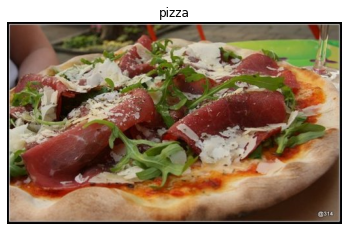

In [23]:
random_image = view_random_image(
    target_dir='pizza_steak/train/',
    target_class='pizza',
)

In [24]:
random_image

array([[[ 1,  7,  7],
        [ 0,  1,  2],
        [ 7,  9,  8],
        ...,
        [ 0,  1,  0],
        [ 0,  1,  0],
        [ 1,  5,  4]],

       [[ 5, 11, 11],
        [ 2,  6,  7],
        [ 7,  7,  7],
        ...,
        [ 1,  3,  0],
        [ 5,  7,  6],
        [ 2,  6,  5]],

       [[ 0,  1,  0],
        [ 2,  4,  3],
        [ 1,  0,  0],
        ...,
        [ 7,  9,  6],
        [ 3,  5,  4],
        [ 0,  1,  0]],

       ...,

       [[15, 11, 10],
        [12,  8,  7],
        [ 3,  0,  0],
        ...,
        [ 0,  0,  0],
        [ 3,  3,  3],
        [ 3,  3,  3]],

       [[ 1,  0,  0],
        [ 5,  3,  4],
        [ 7,  6,  4],
        ...,
        [ 2,  2,  2],
        [ 0,  0,  0],
        [ 0,  0,  0]],

       [[ 5,  3,  4],
        [ 5,  3,  4],
        [ 1,  0,  0],
        ...,
        [ 0,  0,  0],
        [ 1,  1,  1],
        [ 6,  6,  6]]], dtype=uint8)

All values Are between 0 and 255 & there are 3 dimensions for each color channel of RGB

The model will be finding patterns in the different pixel values to determine which class it looks like

In [25]:
random_image / 255.

array([[[0.00392157, 0.02745098, 0.02745098],
        [0.        , 0.00392157, 0.00784314],
        [0.02745098, 0.03529412, 0.03137255],
        ...,
        [0.        , 0.00392157, 0.        ],
        [0.        , 0.00392157, 0.        ],
        [0.00392157, 0.01960784, 0.01568627]],

       [[0.01960784, 0.04313725, 0.04313725],
        [0.00784314, 0.02352941, 0.02745098],
        [0.02745098, 0.02745098, 0.02745098],
        ...,
        [0.00392157, 0.01176471, 0.        ],
        [0.01960784, 0.02745098, 0.02352941],
        [0.00784314, 0.02352941, 0.01960784]],

       [[0.        , 0.00392157, 0.        ],
        [0.00784314, 0.01568627, 0.01176471],
        [0.00392157, 0.        , 0.        ],
        ...,
        [0.02745098, 0.03529412, 0.02352941],
        [0.01176471, 0.01960784, 0.01568627],
        [0.        , 0.00392157, 0.        ]],

       ...,

       [[0.05882353, 0.04313725, 0.03921569],
        [0.04705882, 0.03137255, 0.02745098],
        [0.01176471, 0

## An end-to-end example

Build a CNN to find patterns in images:
* Load images
* Preprocess images
* Build CNN model
* Compile CNN
* Fit CNN

In [1]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [40]:
tf.random.set_seed(42)

# Preprocess data with data augmentation
train_datagen = ImageDataGenerator(rescale=1/255.)
valid_datagen = ImageDataGenerator(rescale=1/255.)

# Setup the train and test directories
train_dir = 'pizza_steak/train/'
test_dir = 'pizza_steak/test/'

# Fetch images from directories
train_data = train_datagen.flow_from_directory(
    directory=train_dir,
    # One of the most common batch size in deep learning
    batch_size=32,
    # Most models require this shape
    target_size=(224, 224),
    class_mode='binary',
    seed=42
)
valid_data = valid_datagen.flow_from_directory(
    directory=test_dir,
    batch_size=32,
    target_size=(224, 224),
    class_mode='binary',
    seed=42
)

# Build model
model_1 = tf.keras.Sequential([
    tf.keras.layers.Conv2D(
        filters=10,
        # (3, 3) Height and width of window - can be single integer if both are same
        kernel_size=3,
        activation='relu',
        # datagen reshaped sizes, color channel
        input_shape=(224, 224, 3)
    ),
    tf.keras.layers.Conv2D(filters=10, kernel_size=3, activation='relu'),
    tf.keras.layers.MaxPool2D(pool_size=2, padding='valid'),
    tf.keras.layers.Conv2D(filters=10, kernel_size=3, activation='relu'),
    tf.keras.layers.Conv2D(filters=10, kernel_size=3, activation='relu'),
    tf.keras.layers.MaxPool2D(2),
    tf.keras.layers.Flatten(),
    # Output layer
    tf.keras.layers.Dense(1, activation='sigmoid'),
])

# Compile model
model_1.compile(
    loss=tf.keras.losses.BinaryCrossentropy(),
    optimizer=tf.keras.optimizers.Adam(),
    metrics=['accuracy']
)

# Fit model
history_1 = model_1.fit(
    train_data,
    epochs=5,
    # all batches each epoch
    steps_per_epoch=len(train_data),
    validation_data=valid_data,
    validation_steps=len(valid_data)
)

Found 1500 images belonging to 2 classes.
Found 500 images belonging to 2 classes.
Epoch 1/5
47/47 [==============================] - 81s 2s/step - loss: 0.5822 - accuracy: 0.6720 - val_loss: 0.3715 - val_accuracy: 0.8320
Epoch 2/5
47/47 [==============================] - 79s 2s/step - loss: 0.4359 - accuracy: 0.8053 - val_loss: 0.3628 - val_accuracy: 0.8560
Epoch 3/5
47/47 [==============================] - 78s 2s/step - loss: 0.3961 - accuracy: 0.8287 - val_loss: 0.3296 - val_accuracy: 0.8660
Epoch 4/5
47/47 [==============================] - 73s 2s/step - loss: 0.3493 - accuracy: 0.8520 - val_loss: 0.3081 - val_accuracy: 0.8680
Epoch 5/5
47/47 [==============================] - 77s 2s/step - loss: 0.3088 - accuracy: 0.8760 - val_loss: 0.2977 - val_accuracy: 0.8660


In [41]:
model_1.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_16 (Conv2D)          (None, 222, 222, 10)      280       
                                                                 
 conv2d_17 (Conv2D)          (None, 220, 220, 10)      910       
                                                                 
 max_pooling2d_8 (MaxPooling  (None, 110, 110, 10)     0         
 2D)                                                             
                                                                 
 conv2d_18 (Conv2D)          (None, 108, 108, 10)      910       
                                                                 
 conv2d_19 (Conv2D)          (None, 106, 106, 10)      910       
                                                                 
 max_pooling2d_9 (MaxPooling  (None, 53, 53, 10)       0         
 2D)                                                  

In [46]:
# Attempt previous best classification model
tf.random.set_seed(42)

model_2 = tf.keras.Sequential([
    tf.keras.Input(shape=(224, 224, 3)),
    tf.keras.layers.Dense(4, activation='relu'),
    tf.keras.layers.Dense(4, activation='relu'),
    tf.keras.layers.Dense(1, activation='sigmoid'),
])

model_2.compile(
    loss=tf.keras.losses.BinaryCrossentropy(),
    optimizer=tf.keras.optimizers.Adam(),
    metrics=['accuracy']
)

history_2 = model_2.fit(
    train_data,
    epochs=5,
    steps_per_epoch=len(train_data),
    validation_data=valid_data,
    validation_steps=len(valid_data)
)

Epoch 1/5


ValueError: in user code:

    File "c:\users\acer\appdata\local\programs\python\python37\lib\site-packages\keras\engine\training.py", line 1051, in train_function  *
        return step_function(self, iterator)
    File "c:\users\acer\appdata\local\programs\python\python37\lib\site-packages\keras\engine\training.py", line 1040, in step_function  **
        
    File "c:\users\acer\appdata\local\programs\python\python37\lib\site-packages\keras\engine\training.py", line 1030, in run_step  **
        inputs = tf.keras.layers.Input(shape=(10,), name='my_input')
    File "c:\users\acer\appdata\local\programs\python\python37\lib\site-packages\keras\engine\training.py", line 890, in train_step
        
    File "c:\users\acer\appdata\local\programs\python\python37\lib\site-packages\keras\engine\training.py", line 949, in compute_loss
        raise ValueError(
    File "c:\users\acer\appdata\local\programs\python\python37\lib\site-packages\keras\engine\compile_utils.py", line 201, in __call__
        
    File "c:\users\acer\appdata\local\programs\python\python37\lib\site-packages\keras\losses.py", line 139, in __call__
        """
    File "c:\users\acer\appdata\local\programs\python\python37\lib\site-packages\keras\losses.py", line 243, in call  **
        `SUM_OVER_BATCH_SIZE` will raise an error. Please see this custom
    File "c:\users\acer\appdata\local\programs\python\python37\lib\site-packages\keras\losses.py", line 1930, in binary_crossentropy
        def _logcosh(x):
    File "c:\users\acer\appdata\local\programs\python\python37\lib\site-packages\keras\backend.py", line 5283, in binary_crossentropy
        return x

    ValueError: `logits` and `labels` must have the same shape, received ((None, 224, 224, 1) vs (None,)).


In [47]:
# Attempt previous best classification model
tf.random.set_seed(42)

model_2 = tf.keras.Sequential([
    tf.keras.Input(shape=(224, 224, 3)),
    # Dense layers expect a 1D vector as input
    tf.keras.layers.Flatten(input_shape=(224, 224, 3)),
    tf.keras.layers.Dense(4, activation='relu'),
    tf.keras.layers.Dense(4, activation='relu'),
    tf.keras.layers.Dense(1, activation='sigmoid'),
])

model_2.compile(
    loss=tf.keras.losses.BinaryCrossentropy(),
    optimizer=tf.keras.optimizers.Adam(),
    metrics=['accuracy']
)

history_2 = model_2.fit(
    train_data,
    epochs=5,
    steps_per_epoch=len(train_data),
    validation_data=valid_data,
    validation_steps=len(valid_data)
)

Epoch 1/5
47/47 [==============================] - 17s 345ms/step - loss: 1.4353 - accuracy: 0.5127 - val_loss: 0.6932 - val_accuracy: 0.5000
Epoch 2/5
47/47 [==============================] - 9s 202ms/step - loss: 0.6933 - accuracy: 0.5000 - val_loss: 0.6932 - val_accuracy: 0.5000
Epoch 3/5
47/47 [==============================] - 9s 200ms/step - loss: 0.6932 - accuracy: 0.5000 - val_loss: 0.6932 - val_accuracy: 0.5000
Epoch 4/5
47/47 [==============================] - 9s 197ms/step - loss: 0.6932 - accuracy: 0.5000 - val_loss: 0.6932 - val_accuracy: 0.5000
Epoch 5/5
47/47 [==============================] - 9s 192ms/step - loss: 0.6932 - accuracy: 0.5000 - val_loss: 0.6932 - val_accuracy: 0.5000


In [48]:
model_2.summary()

Model: "sequential_10"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_6 (Flatten)         (None, 150528)            0         
                                                                 
 dense_20 (Dense)            (None, 4)                 602116    
                                                                 
 dense_21 (Dense)            (None, 4)                 20        
                                                                 
 dense_22 (Dense)            (None, 1)                 5         
                                                                 
Total params: 602,141
Trainable params: 602,141
Non-trainable params: 0
_________________________________________________________________


This model has so much more parameters than the CNN one, but still performs worse. (A parameter can be thought as patterns a model can learn from data)

The difference here is that:

> Where a series of dense layers have a number of different learnable parameters connected to each other and hence a higher number of possible learnable patterns, a CNN seeks to sort out and learn the most important patterns in an image. So even though there are less learnable parameters in it, these are often more helpful in decphering between different features in an image.

In [49]:
# Attempt previous best model with more complexity (layers & neurons)
tf.random.set_seed(42)

model_3 = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=(224, 224, 3)),
    tf.keras.layers.Dense(100, activation='relu'),
    tf.keras.layers.Dense(100, activation='relu'),
    tf.keras.layers.Dense(100, activation='relu'),
    tf.keras.layers.Dense(1, activation='sigmoid'),
])

model_3.compile(
    loss=tf.keras.losses.BinaryCrossentropy(),
    optimizer=tf.keras.optimizers.Adam(),
    metrics=['accuracy']
)

history_3 = model_3.fit(
    train_data,
    epochs=5,
    steps_per_epoch=len(train_data),
    validation_data=valid_data,
    validation_steps=len(valid_data)
)

Epoch 1/5
47/47 [==============================] - 35s 718ms/step - loss: 2.6253 - accuracy: 0.6193 - val_loss: 0.5236 - val_accuracy: 0.7500
Epoch 2/5
47/47 [==============================] - 12s 261ms/step - loss: 0.6054 - accuracy: 0.7353 - val_loss: 0.6949 - val_accuracy: 0.7080
Epoch 3/5
47/47 [==============================] - 12s 262ms/step - loss: 0.6574 - accuracy: 0.7300 - val_loss: 0.6693 - val_accuracy: 0.7140
Epoch 4/5
47/47 [==============================] - 11s 238ms/step - loss: 0.6157 - accuracy: 0.7433 - val_loss: 0.5094 - val_accuracy: 0.7380
Epoch 5/5
47/47 [==============================] - 11s 226ms/step - loss: 0.4739 - accuracy: 0.7833 - val_loss: 0.5858 - val_accuracy: 0.7020


In [50]:
model_3.summary()

Model: "sequential_11"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_7 (Flatten)         (None, 150528)            0         
                                                                 
 dense_23 (Dense)            (None, 100)               15052900  
                                                                 
 dense_24 (Dense)            (None, 100)               10100     
                                                                 
 dense_25 (Dense)            (None, 100)               10100     
                                                                 
 dense_26 (Dense)            (None, 1)                 101       
                                                                 
Total params: 15,073,201
Trainable params: 15,073,201
Non-trainable params: 0
_________________________________________________________________


The number of trainable params are now so much more than the CNN, but it still isn't as accurate. This proves the power of CNN's & their ability to learn patterns despite having less params

## Breaking down the CNN

Steps followed:
1. Explore data
2. Preprocess the data
3. Create a model
4. Fit the model
5. Evaluate the model
6. Tune hyperparameters and improve model
7. Repeat until satisfied

### Data exploration

Image shape: (512, 512, 3)
Image shape: (512, 512, 3)


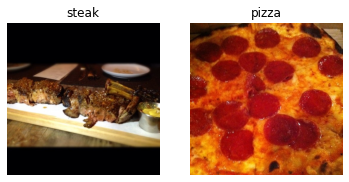

In [57]:
plt.figure()
plt.subplot(1, 2, 1)
steak_img = view_random_image('pizza_steak/train/', 'steak')
plt.subplot(1, 2, 2)
pizza_img = view_random_image('pizza_steak/train/', 'pizza')

### Preprocess data

In [2]:
train_dir = 'pizza_steak/train/'
test_dir = 'pizza_steak/test/'

A batch is a small subset of the dataset a model looks at during training. For example, rather than looking at 10,000 images at one time and trying to figure out the patterns, a model might only look at 32 images at a time. There are a couple of reasons too:
* So many images might not fit into 

In [20]:
train_datagen = ImageDataGenerator(rescale=1/255.)
test_datagen = ImageDataGenerator(rescale=1/255.)

The `ImageDataGenerator` helps in image augmentation & creating image batches. At the moment, only rescaling of the images are done.

In [21]:
train_data = train_datagen.flow_from_directory(
    directory=train_dir,
    target_size=(224, 224),
    class_mode='binary',
    batch_size=32
)

test_data = test_datagen.flow_from_directory(
    directory=test_dir,
    target_size=(224, 224),
    class_mode='binary',
    batch_size=32
)

Found 1500 images belonging to 2 classes.
Found 500 images belonging to 2 classes.


The classes get inferred by the subdirectory names in `train_dir` and `test_dir`.
* `target_size`: input size of the images (w, h)
* `class_mode`: classification problem type (would be `categorical` if > 2 classes)
* `batch_size`: how many images will be in each batch

In [22]:
# Get a sample of the training data batch 
images, labels = train_data.next() # get the 'next' batch of images/labels
len(images), len(labels)

(32, 32)

In [23]:
images[0], images[0].shape

(array([[[0.5568628 , 0.43921572, 0.3372549 ],
         [0.54509807, 0.43529415, 0.34117648],
         [0.49803925, 0.38823533, 0.30588236],
         ...,
         [0.8235295 , 0.49411768, 0.36078432],
         [0.7960785 , 0.44705886, 0.3137255 ],
         [0.80392164, 0.45098042, 0.31764707]],
 
        [[0.35686275, 0.2392157 , 0.19607845],
         [0.3529412 , 0.24313727, 0.19607845],
         [0.32941177, 0.21960786, 0.1764706 ],
         ...,
         [0.7843138 , 0.4666667 , 0.34901962],
         [0.7058824 , 0.37254903, 0.25882354],
         [0.69803923, 0.35686275, 0.24705884]],
 
        [[0.23137257, 0.12156864, 0.11764707],
         [0.26666668, 0.15294118, 0.16078432],
         [0.25490198, 0.14117648, 0.14901961],
         ...,
         [0.69803923, 0.38823533, 0.27058825],
         [0.6901961 , 0.36078432, 0.2509804 ],
         [0.6745098 , 0.34509805, 0.24313727]],
 
        ...,
 
        [[0.32941177, 0.227451  , 0.2627451 ],
         [0.36862746, 0.28235295, 0.29411

In [24]:
labels

array([0., 0., 0., 1., 0., 1., 0., 0., 0., 0., 0., 1., 1., 1., 0., 1., 0.,
       0., 0., 0., 0., 0., 1., 0., 1., 0., 0., 1., 1., 0., 0., 0.],
      dtype=float32)

Images and labels have already been preprocessed as neccesary because of the `ImageDataGenerator`

### Create baseline model

**Note** A baseline model is a relatively simply model created when beginning a ML project. Which is attempted to be beaten via experimentation

A simple heuristic for computer vision models is to use the model architecture which is performing best on ImageNet. However, its good to begin with a baseline model to obtain a baseline result which can be improved

**Note** A simple model refers to models having less layers (3-4 layers) than state-of-the-art models. Ex: ResNet50 (50+ layers)

In [25]:
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.layers import Dense, Flatten, Conv2D, MaxPool2D, Activation
from tensorflow.keras import Sequential

In [28]:
model_4 = Sequential([
    Conv2D(
        filters=10,
        kernel_size=3,
        strides=1,
        padding='valid',
        activation='relu',
        # Same as making a separate Input layer before this
        input_shape=(224, 224, 3)
    ),
    Conv2D(10, 3, activation='relu'),
    Conv2D(10, 3, activation='relu'),
    Flatten(),
    Dense(1, activation='sigmoid')
])

A typical CNN architecture would be as follows:

```javascript
Input -> Conv + ReLU -> Conv + ReLU -> Pooling Layer -> Dense layer as output
```

Structure of a `Conv2D` layer:
* `filters` - Decides how many filters (kernels/windows) should pass over the image (Typical values are 10, 32, 64, 128)
* `kernel_size` - Determines the shape of the filters (Typical values are 3, 5, 7). A size of 3 would mean that a 3x3 filter would pass over the image at a time - therefore, smaller the `kernel_size` greater the fine-grained features it will extract
* `padding` - pads the image with zeroes (`'same'`) to preserve output  shape same as input. Or leaves it as is (`'valid'`) to lower output shape by cutting off features where the filter could not fit
* `strides` - number of steps (pixels) a filter takes across an image at a time (Typical values are 1, 2)

A **feature** can be considered as a significant part of an image the model should learn (Ex: shape of a pizza)

### Fit model

In [31]:
model_4.compile(
    loss=tf.keras.losses.BinaryCrossentropy(),
    optimizer=Adam(),
    metrics=['accuracy']
)

In [32]:
model_4.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_6 (Conv2D)           (None, 222, 222, 10)      280       
                                                                 
 conv2d_7 (Conv2D)           (None, 220, 220, 10)      910       
                                                                 
 conv2d_8 (Conv2D)           (None, 218, 218, 10)      910       
                                                                 
 flatten_2 (Flatten)         (None, 475240)            0         
                                                                 
 dense_2 (Dense)             (None, 1)                 475241    
                                                                 
Total params: 477,341
Trainable params: 477,341
Non-trainable params: 0
_________________________________________________________________


`steps_per_epoch` - number of `train_data` batches the model will process per epoch. In this case, `len(train_data)` means that the model will go through all batches

`validation_steps` - same as above, but for `validation_data`

In [33]:
history_4 = model_4.fit(
    train_data,
    epochs=5,
    steps_per_epoch=len(train_data),
    validation_data=test_data,
    validation_steps=len(test_data)
)

Epoch 1/5
47/47 [==============================] - 94s 2s/step - loss: 1.1608 - accuracy: 0.6667 - val_loss: 0.5008 - val_accuracy: 0.7520
Epoch 2/5
47/47 [==============================] - 81s 2s/step - loss: 0.4908 - accuracy: 0.7693 - val_loss: 0.4322 - val_accuracy: 0.7960
Epoch 3/5
47/47 [==============================] - 80s 2s/step - loss: 0.4084 - accuracy: 0.8280 - val_loss: 0.3416 - val_accuracy: 0.8460
Epoch 4/5
47/47 [==============================] - 83s 2s/step - loss: 0.3111 - accuracy: 0.8713 - val_loss: 0.3714 - val_accuracy: 0.8240
Epoch 5/5
47/47 [==============================] - 84s 2s/step - loss: 0.1835 - accuracy: 0.9353 - val_loss: 0.3518 - val_accuracy: 0.8460


Model seems to have overfit

### Evaluate model

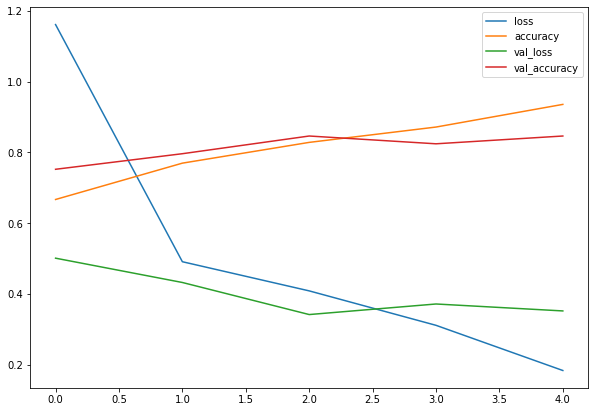

In [35]:
import pandas as pd
pd.DataFrame(history_4.history).plot(figsize=(10, 7));

**Note** When a model's validation loss starts to increase, it's likely overfitting (learning training data patterns too well so that it cannot generalize well)

In [37]:
history_4.history

{'loss': [1.1608439683914185,
  0.49081578850746155,
  0.4084445834159851,
  0.3111378252506256,
  0.18348737061023712],
 'accuracy': [0.6666666865348816,
  0.7693333625793457,
  0.828000009059906,
  0.8713333606719971,
  0.9353333115577698],
 'val_loss': [0.5008476376533508,
  0.43215158581733704,
  0.3415585160255432,
  0.3714137375354767,
  0.35180506110191345],
 'val_accuracy': [0.7519999742507935,
  0.7960000038146973,
  0.8460000157356262,
  0.8240000009536743,
  0.8460000157356262]}

In [44]:
import matplotlib.pyplot as plt

# Plot validation and training curves separately
def plot_loss_curves(history):
    loss = history.history['loss']
    val_loss = history.history['val_loss']
    
    accuracy = history.history['accuracy']
    val_accuracy = history.history['val_accuracy']
    
    epochs = range(len(history.history['loss']))
    
    plt.plot(epochs, loss, label='Training loss')
    plt.plot(epochs, val_loss, label='Validation loss')
    plt.title('Loss')
    plt.xlabel('Epochs')
    plt.legend();
    
    plt.figure() # Create another plt figure
    plt.plot(epochs, accuracy, label='Training Accuracy')
    plt.plot(epochs, val_accuracy, label='Validation Accuracy')
    plt.title('Accuracy')
    plt.xlabel('Epochs')
    plt.legend();

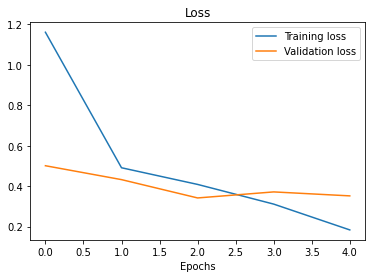

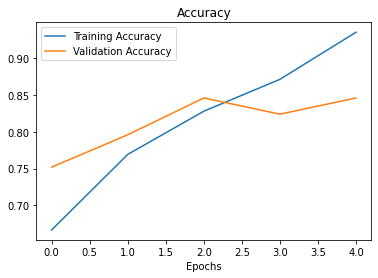

In [45]:
plot_loss_curves(history_4)

The ideal position for these two curves is to follow each other. If anything, the validation curve should be slightly under the training curve. If there's a large gap between the training curve and validation curve, it means the model is overfitting.